<a href="https://colab.research.google.com/github/secons127/2024-1-my-BDA/blob/main/inclass/04w_240326_tue_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**

#파이썬 설치 확인

In [2]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [3]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


#그래프 해상도 설정

In [ ]:
%%html
<!--마크다운 표 정렬 설정-->
<style> table {float:left} </style>

#코랩에서 한글 처리

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.7 MB/s eta 0:00:00


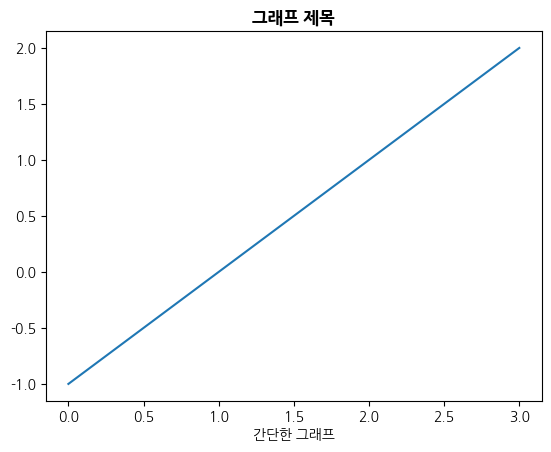

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목', fontweight="bold")
plt.xlabel('간단한 그래프')
plt.show()

In [4]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.72 MiB/s, done.


In [5]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [6]:
exam.sample(5)

,id,nclass,math,english,science
18,19,5,89,68,87
15,16,4,58,98,65
11,12,3,45,85,32
1,2,1,60,97,60
14,15,4,75,56,78


In [7]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [8]:
# 2반인 경우만 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [10]:
#수학 점수가 50점을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [11]:
#영어 점수가 80점 이하인 경우
exam.query('english < 80')

,id,nclass,math,english,science
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


### 초과, 미만, 이상, 이하 조건 걸기

In [ ]:
# 수학 점수가 50점을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
# 수학 점수가 50점 미만인 경우
exam.query('math < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
8,9,3,20,98,15
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [ ]:
# 영어 점수가 50점 이상인 경우
exam.query('english >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# 영어 점수가 80점 이하인 경우
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


### 여러 조건을 충족하는 행 추출하기

In [ ]:
# 1반이면서 수학 점수가 50 점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
exam[(exam.nclass == 1) & (exam.math >= 50)] # 괄호를 반드시 사용

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
# 2반이면서 영어 점수가 80 점 이상인 경우
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


### 여러 조건 중 하나 이상 충족하는 행 추출하기

In [ ]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [ ]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


### 목록에 해당하는 행 추출하기

In [ ]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [1, 3, 5]') # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
exam[exam.nclass.isin([1, 3, 5])] # 시험 예상!!!!!!!!!!!!!!!!!!!!!!

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
exam[exam["nclass"].isin([1, 3])]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [ ]:
exam["nclass"]
# [[]] 데이터프레임~

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

### 추출한 행으로 데이터 만들기

In [ ]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [ ]:
nclass1['math'].mean()  # 1반 수학 점수 평균 구하기

46.25

In [ ]:
nclass2['math'].mean()  # 2반 수학 점수 평균 구하기

61.25

In [ ]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]

In [ ]:
nclass1['math'].mean()  # 1반 수학 점수 평균 구하기

46.25

In [ ]:
nclass1.math.mean()  # 1반 수학 점수 평균 구하기

46.25

In [ ]:
nclass2.math.mean()  # 2반 수학 점수 평균 구하기

61.25

### 문자 변수를 이용해 조건에 맞는 행 추출하기

In [ ]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [ ]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [ ]:
# 전체 조건에 큰따옴표, 추출할 문자에 작은따옴표 사용
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


In [ ]:
# 전체 조건과 추출할 문자에 모두 작은따옴표 사용
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


---

### (알아 두면 좋아요) 외부 변수를 이용해 추출하기

In [ ]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [ ]:
exam[exam.nclass == var]

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


---

### (알아 두면 좋아요) 파이썬에서 사용하는 기호


| 논리 연산자 | 기능        |
|:-----------:|-------------|
| <           | 작다        |
| <=          | 작거나 같다 |
| >           | 크다        |
| >=          | 크거나 같다 |
| ==          | 같다        |
| !=          | 같지 않다   |
| \|          | 또는        |
| &           | 그리고      |
| in          | 매칭 확인   |

| 산술 연산자 | 기능            |
|:-----------:|-----------------|
| +           | 더하기          |
| -           | 빼기            |
| *           | 곱하기          |
| **          | 제곱            |
| /           | 나누기          |
| //          | 나눗셈의 몫     |
| %           | 나눗셈의 나머지 |

---

### (알아 두면 좋아요) 데이터 프레임 출력 제한 설정하기

In [ ]:
pd.set_option('display.max_rows', None)     # 모든 행 출력하도록 설정
pd.set_option('display.max_columns', None)  # 모든 열 출력하도록 설정

In [ ]:
pd.reset_option('display.max_rows')     # 행(60행까지) 출력 제한 되돌리기
pd.reset_option('display.max_columns')  # 열(20열까지) 출력 제한 되돌리기

------------------------------------------------------------------------

### 메소드 df.isin()

In [ ]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [ ]:
df.isin([0, 2])

,num_legs,num_wings
falcon,True,True
dog,False,True


In [ ]:
~df.isin([0, 2])

,num_legs,num_wings
falcon,False,False
dog,True,False


In [ ]:
df.isin({'num_wings': [0, 3]})

,num_legs,num_wings
falcon,False,False
dog,False,True


> 값이 Series(시리즈) 또는 DataFrame(데이터 프레임)인 경우 인덱스와 열이 일치해야 합니다. 'falcon(팔콘)'은 다른 부분의 다리 수를 기준으로 일치하지 않습니다.


In [ ]:
other = pd.DataFrame({'num_legs': [8, 3], 'num_wings': [0, 2]},
                     index=['spider', 'falcon'])
df.isin(other)

,num_legs,num_wings
falcon,False,True
dog,False,False


In [ ]:
s = pd.Series(['llama', 'cow', 'llama', 'beetle', 'llama', 'hippo'], name='animal')
s.isin(['cow', 'llama'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [ ]:
~s.isin(['cow', 'llama'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: animal, dtype: bool

In [ ]:
s.isin(['llama'])

0     True
1    False
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [ ]:
print(pd.Series([1]).isin(['1']))
print(pd.Series([1.1]).isin(['1.1']))

0    False
dtype: bool
0    False
dtype: bool


In [ ]:
print(pd.Series([1]).isin([1]))
print(pd.Series([1.1]).isin([1.1]))

0    True
dtype: bool
0    True
dtype: bool


## 06-3 필요한 변수만 추출하기

### 변수 추출하기

In [ ]:
exam['math']  # math 추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [ ]:
exam['english']  # english 추출

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [ ]:
exam[['english']]  # english 추출

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [ ]:
exam.english

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [15]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [ ]:
exam[[exam.columns[3]]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [ ]:
 exam.columns[2]

'math'

In [ ]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [ ]:
exam[[exam.columns[3]]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


#### 여러 변수 추출하기



In [ ]:
exam[['nclass', 'math', 'english']]  # nclass, math, english 추출

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


------------------------------------------------------------------------

#### (알아 두면 좋아요) 변수가 1개 일 때 데이터 프레임 유지하기

In [ ]:
# 시리즈로 추출
exam['math']

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [ ]:
# 데이터 프레임으로 추출
exam[['math']]

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


------------------------------------------------------------------------

### 변수 제거하기



In [ ]:
exam.drop(columns = 'math')  # math 제거

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [ ]:
exam.drop(columns = ['math', 'english'])  # math, english 제거

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


### drop 학습

In [ ]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.drop(1) # 행 삭제

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [ ]:
exam.drop([1, 2]) # 여러 행 삭제

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [ ]:
exam.drop('nclass', axis=1) # 열 삭제

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [14]:
exam.drop(['nclass', 'english'], axis=1) # 여러 열 삭제

,id,math,science
0,1,50,50
1,2,60,60
2,3,45,78
3,4,30,58
4,5,25,65
5,6,50,98
6,7,80,45
7,8,90,25
8,9,20,15
9,10,50,45


In [ ]:
exam.drop(columns = ['nclass', 'english']) # 여러 열 삭제

,id,math,science
0,1,50,50
1,2,60,60
2,3,45,78
3,4,30,58
4,5,25,65
5,6,50,98
6,7,80,45
7,8,90,25
8,9,20,15
9,10,50,45


### pandas 함수 조합하기

#### `query()`와 `[]` 조합하기

In [ ]:
# nclass가 1인 행만 추출한 다음 english 추출
exam.query('nclass == 1')['english']

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [ ]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


#### 일부만 출력하기

In [ ]:
# math가 50 이상인 행만 추출한 다음 id, math 앞부분 5행까지 추출
exam.query('math >= 50')[['id', 'math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [ ]:
# math가 50 이상인 행만 추출한 다음 id, math 앞부분 10행까지 추출
exam.query('math >= 50')[['id', 'math']].head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


### 가독성 있게 코드 줄 바꾸기

In [ ]:
# math가 50 이상인 행만 추출
# id, math 추출
# 앞부분 10행 추출
exam.query('math >= 50') \
    [['id', 'math']] \
    .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [ ]:
exam.query('math >= 50 & english >= 80') \
         [['id', 'math', 'english']] \
         .head()

,id,math,english
0,1,50,98
1,2,60,97
5,6,50,89
6,7,80,90
9,10,50,98


---

## 06-4 순서대로 정렬하기 152p

### 오름차순으로 정렬하기

In [ ]:
exam.sort_values('math')  # math 오름차순 정렬

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


### 내림차순으로 정렬하기



In [ ]:
exam.sort_values('math', ascending = False)  # math 내림차순 정렬

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


### 여러 정렬 기준 적용하기

In [ ]:
# nclass, math 오름차순 정렬
exam.sort_values(['nclass', 'math'])

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [ ]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


------------------------------------------------------------------------

## 06-5 파생변수 추가하기

### 파생변수 추가하기

In [ ]:
# total 변수 추가
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [ ]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
# total 변수 추가
exam['total'] = exam['math'] + exam['english'] + exam['science']
exam

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


#### 여러 파생변수 한 번에 추가하기

In [ ]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],       # total 추가
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)  # mean 추가

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


### `df.assign()`에 `np.where()` 적용하기

In [ ]:
import numpy as np
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

,id,nclass,math,english,science,total,test
0,1,1,50,98,50,198,fall
1,2,1,60,97,60,217,pass
2,3,1,45,86,78,209,pass
3,4,1,30,98,58,186,fall
4,5,2,25,80,65,170,pass
5,6,2,50,89,98,237,pass
6,7,2,80,90,45,215,fall
7,8,2,90,78,25,193,fall
8,9,3,20,98,15,133,fall
9,10,3,50,98,45,193,fall


### 추가한 변수를 `pandas` 함수에 바로 활용하기


In [ ]:
# total 변수 추가
# total 기준 정렬
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


### `lambda` 이용해 데이터 프레임명 줄여 쓰기



In [ ]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv('exam.csv')

# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [ ]:
# long_name 대신 x 입력
long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


#### 앞에서 만든 변수를 활용해 다시 변수 만들기

In [ ]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [ ]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [ ]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = exam['total'] / 3)

KeyError: 'total'

---

## 06-6 집단별로 요약하기

### 집단별로 요약하기

#### 전체 요약 통계량 구하기


In [ ]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


#### 집단별 요약 통계량 구하기



In [ ]:
# nclass별로 분리하기
# math 평균 구하기
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


------------------------------------------------------------------------

#### (알아 두면 좋아요) 변수를 인덱스로 바꾸지 않기

In [ ]:
exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


------------------------------------------------------------------------

#### 여러 요약 통계량 한 번에 구하기



In [ ]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


---

### (알아 두면 좋아요) 모든 변수의 요약 통계량 한 번에 구하기

In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


------------------------------------------------------------------------

### 집단별로 다시 집단 나누기

In [ ]:
mpg = pd.read_csv('mpg.csv')

In [ ]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']) \
   .agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [ ]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"') \
   .groupby(['drv']) \
   .agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [ ]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"') \
   .groupby(['drv']) \
   .agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


------------------------------------------------------------------------

#### (알아 두면 좋아요) `value_counts()`로 집단별 빈도 간단하게 구하기

In [ ]:
mpg.groupby('drv') \
   .agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [ ]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [ ]:
mpg['drv'].value_counts().query('n > 100')

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100')

,n
drv,
f,106
4,103


------------------------------------------------------------------------

### `pandas` 함수 조합하기

In [ ]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


---

## 06-7 데이터 합치기

### 가로로 합치기

In [ ]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1  # test1 출력

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2  # test2 출력

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
# id 기준으로 합쳐서 total에 할당
total = pd.merge(test1, test2, how = 'left', on = 'id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


#### 다른 데이터를 활용해 변수 추가하기

In [ ]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [ ]:
# nclass 기준으로 합쳐서 exam_new에 할당
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기

In [ ]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [ ]:
group_a  # group_a 출력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
# 데이터 합쳐서 group_all에 할당
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


---

### 정리하기

In [16]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')


## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거


## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()


## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])


## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()


## 6. 집단별로 요약하기
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']) \
   .agg(mean_cty = ('cty', 'mean'))


## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

NameError: name 'mpg' is not defined